In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.core.common import random_state
from sklearn.metrics import mean_squared_error , r2_score
import warnings
warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df = df[~df['total_sqft'].str.contains(' - ')]
#Convert data to numeric
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [89]:
df.describe()

,total_sqft,bath,balcony,price
count,13073.000000,13103.000000,12567.000000,13119.000000
mean,1554.942029,2.693429,1.602530,112.641867
std,1238.458773,1.338620,0.804038,149.577568
min,1.000000,1.000000,0.000000,8.000000
25%,1100.000000,2.000000,1.000000,50.000000
50%,1275.000000,2.000000,2.000000,72.000000
75%,1670.000000,3.000000,2.000000,120.000000
max,52272.000000,40.000000,3.000000,3600.000000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13119 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13119 non-null  object 
 1   availability  13119 non-null  object 
 2   location      13118 non-null  object 
 3   size          13111 non-null  object 
 4   society       7617 non-null   object 
 5   total_sqft    13073 non-null  float64
 6   bath          13103 non-null  float64
 7   balcony       12567 non-null  float64
 8   price         13119 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [91]:
df.isnull().sum()

area_type          0
availability       0
location           1
size               8
society         5502
total_sqft        46
bath              16
balcony          552
price              0
dtype: int64

In [92]:
df.dropna(inplace=True)
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [93]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00


In [94]:
df_encoded = pd.get_dummies(df, columns=['area_type', 'availability', 'location', 'size', 'society'])
df_encoded.shape

(7337, 3288)

In [95]:
data.head()

,size,total_sqft,bath,balcony,price,location_ Anekal,location_ Banaswadi,location_ Basavangudi,location_ Bhoganhalli,location_ Devarabeesana Halli,...,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Immediate Possession,availability_Ready To Move,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2,1056,2.0,1.0,39.07,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,4,2600,5.0,3.0,120.00,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,3,1440,2.0,3.0,62.00,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,3,1521,3.0,1.0,95.00,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,2,1200,2.0,1.0,51.00,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [96]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)


In [98]:
model = LinearRegression()


In [99]:
model.fit(X_train, y_train)

LinearRegression()

In [105]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 3.287647405491015e+19
Root Mean Squared Error (RMSE): 5733801012.84568
R-squared: -2506039525944637.0


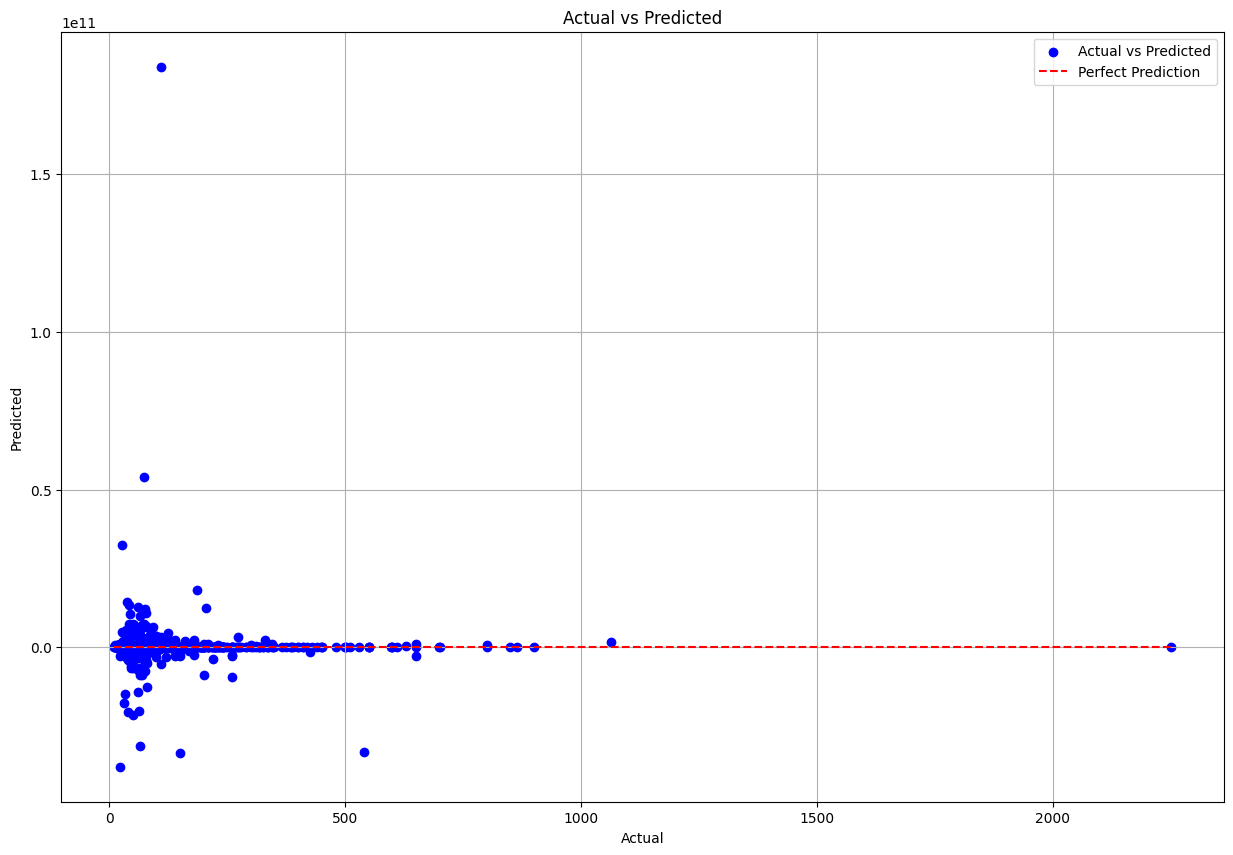

In [106]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred , color='blue' , label = 'Actual vs Predicted')
plt.plot( [y_test.min(),y_test.max()], [y_test.min(),y_test.max()] , color = 'red' , linestyle = '--' , label ='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()